In [1]:
!ls /kaggle/input/emotion-dataset/

test.csv  training.csv	validation.csv


In [2]:
import pandas as pd
import numpy as np

validation = pd.read_csv('/kaggle/input/emotion-dataset/validation.csv')
train = pd.read_csv('/kaggle/input/emotion-dataset/training.csv')
test = pd.read_csv('/kaggle/input/emotion-dataset/test.csv')

print('Dataset information:')
print(f'Training data: {train.shape}')
print(f'Validation data: {validation.shape}')
print(f'Test data: {test.shape}')

Dataset information:
Training data: (16000, 2)
Validation data: (2000, 2)
Test data: (2000, 2)


In [3]:
train['text'].values[:10]

array(['i didnt feel humiliated',
       'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
       'im grabbing a minute to post i feel greedy wrong',
       'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
       'i am feeling grouchy',
       'ive been feeling a little burdened lately wasnt sure why that was',
       'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
       'i feel as confused about life as a teenager or as jaded as a year old man',
       'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
       'i feel romantic too'], dtype=object)

In [4]:
from datasets import Dataset,DatasetDict,Features,Value,ClassLabel

# Don't forget the class label data
class_names = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
ft = Features({'text': Value('string'), 'label': ClassLabel(names=class_names)})

# Combine Multiple Datasets 
emotions = DatasetDict({
    "train": Dataset.from_pandas(train,features=ft),
    "test": Dataset.from_pandas(test,features=ft),
    "validation": Dataset.from_pandas(validation,features=ft)
    })

emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
# Training Data
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [6]:
# Get First 5 Entries in Dictionary Format (Group them)
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [7]:
# Convert Dataset to DataFrame (don't forget to reset)
emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [8]:
# Add label data to dataframe
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [9]:
from transformers import AutoTokenizer

text = 'Tokenisation of text is a core task of NLP.'

# Load parameters of the tokeniser
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

# Show tokeniser information
tokenizer

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

PreTrainedTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [10]:
print('')
print(f'Vocab size: {tokenizer.vocab_size}')
print(f'Max length: {tokenizer.model_max_length}')
print(f'Tokeniser model input names: {tokenizer.model_input_names}')


Vocab size: 30522
Max length: 512
Tokeniser model input names: ['input_ids', 'attention_mask']


In [11]:
print('Encoded text')
encoded_text = tokenizer(text)
print(encoded_text,'\n')

print('Tokens')
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens,'\n')

print('Convert tokens to string')
print(tokenizer.convert_tokens_to_string(tokens),'\n')

Encoded text
{'input_ids': [101, 19204, 6648, 1997, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]} 

Tokens
['[CLS]', 'token', '##isation', 'of', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]'] 

Convert tokens to string
[CLS] tokenisation of text is a core task of nlp. [SEP] 



In [12]:
# Convert DataFrame back to Dataset
emotions.reset_format()

In [13]:
# Tokenisation function
def tokenise(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

# Show the tokenised ids
ex_tokenised = tokenise(emotions["train"][:2])

In [14]:
# Show attention mask
ex_tokenised['attention_mask']

[[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

In [15]:
# apply to the entire dataset (train,test and validation dataset)
emotions_encoded = emotions.map(tokenise, batched=True, batch_size=None)
print(emotions_encoded["train"].column_names)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

['text', 'label', 'input_ids', 'attention_mask']


In [16]:
import warnings; warnings.filterwarnings('ignore')
from transformers import AutoModel
import torch

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [17]:
# Prepare data for modelling
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [18]:
def extract_hidden_states(batch):
    
    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}
    
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
        
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [19]:
# Extract last hidden states (faster w/ GPU)
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)
emotions_hidden["train"].column_names

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [20]:
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
print(f'Training Dataset: {X_train.shape}')
print(f'Validation Dataset {X_valid.shape}')

Training Dataset: (16000, 768)
Validation Dataset (2000, 768)


In [21]:
labels = emotions["train"].features["label"].names

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_model, y_true, labels):
    cm = confusion_matrix(y_true,y_model,normalize='true')
    fig, ax = plt.subplots(figsize=(7,7))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(ax=ax, colorbar=False)
    plt.title("Confusion matrix")
#     plt.axis('off')
    plt.grid(False)
    plt.show()

In [23]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model_ckpt = "distilbert-base-uncased"
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, 
                          num_labels=num_labels)
         .to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'pre_clas

In [24]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [25]:
from transformers import Trainer, TrainingArguments

bs = 64 # batch size
logging_steps = len(emotions_encoded["train"]) // bs
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=3,             # number of training epochs
                                  learning_rate=2e-5,             # model learning rate
                                  per_device_train_batch_size=bs, # batch size
                                  per_device_eval_batch_size=bs,  # batch size
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False, 
                                  report_to="none",
                                  logging_steps=logging_steps,
                                  push_to_hub=False,
                                  log_level="error")

In [26]:
import os
from transformers import Trainer
os.environ['WANDB_DISABLED'] = 'true'

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.813500,0.276588,0.909000,0.907949
2,0.215200,0.183879,0.925000,0.925155
3,0.148500,0.170501,0.931000,0.931099


TrainOutput(global_step=750, training_loss=0.39240535990397135, metrics={'train_runtime': 215.9215, 'train_samples_per_second': 222.303, 'train_steps_per_second': 3.473, 'total_flos': 1080514292544000.0, 'train_loss': 0.39240535990397135, 'epoch': 3.0})

In [27]:
# Predict on Validation Dataset
pred_output = trainer.predict(emotions_encoded["validation"])
pred_output

PredictionOutput(predictions=array([[ 4.9015217 , -0.9388617 , -1.1830484 , -1.3473666 , -0.92226183,
        -1.4904745 ],
       [ 5.2193575 , -0.9748055 , -1.7542058 , -1.1745234 , -0.7919455 ,
        -1.5622809 ],
       [-1.4403967 ,  2.2834258 ,  3.0330086 , -1.6824883 , -1.9355242 ,
        -1.3727362 ],
       ...,
       [-1.4055306 ,  5.117463  , -0.6116654 , -1.428467  , -1.9428743 ,
        -1.3294487 ],
       [-2.0245585 ,  3.335721  ,  2.567829  , -1.8578247 , -2.1620932 ,
        -1.3307862 ],
       [-1.6226736 ,  4.876437  , -0.32173732, -1.874653  , -2.0208592 ,
        -0.5708423 ]], dtype=float32), label_ids=array([0, 0, 2, ..., 1, 1, 1]), metrics={'test_loss': 0.17050093412399292, 'test_accuracy': 0.931, 'test_f1': 0.931098536245223, 'test_runtime': 2.6928, 'test_samples_per_second': 742.717, 'test_steps_per_second': 11.883})

In [28]:
print(f'Output Predition: {pred_output.predictions.shape}')
print(pred_output.predictions)

Output Predition: (2000, 6)
[[ 4.9015217  -0.9388617  -1.1830484  -1.3473666  -0.92226183 -1.4904745 ]
 [ 5.2193575  -0.9748055  -1.7542058  -1.1745234  -0.7919455  -1.5622809 ]
 [-1.4403967   2.2834258   3.0330086  -1.6824883  -1.9355242  -1.3727362 ]
 ...
 [-1.4055306   5.117463   -0.6116654  -1.428467   -1.9428743  -1.3294487 ]
 [-2.0245585   3.335721    2.567829   -1.8578247  -2.1620932  -1.3307862 ]
 [-1.6226736   4.876437   -0.32173732 -1.874653   -2.0208592  -0.5708423 ]]


In [29]:
# Decode the predictions greedily using argmax (highest value of all classes)
y_preds = np.argmax(pred_output.predictions,axis=1)
print(f'Output Prediction:{y_preds.shape}')
print(f'Predictions: {y_preds}')

Output Prediction:(2000,)
Predictions: [0 0 2 ... 1 1 1]


In [30]:
# Show metrics of last iteration
pred_output.metrics

{'test_loss': 0.17050093412399292,
 'test_accuracy': 0.931,
 'test_f1': 0.931098536245223,
 'test_runtime': 2.6928,
 'test_samples_per_second': 742.717,
 'test_steps_per_second': 11.883}

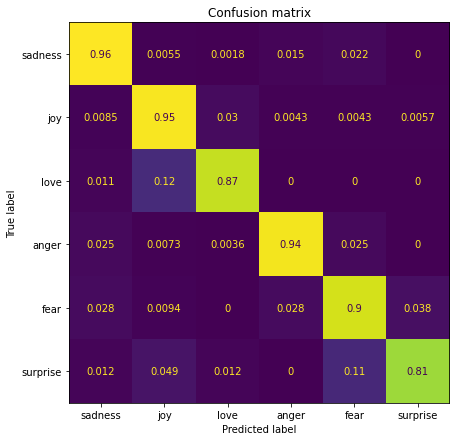

In [31]:
plot_confusion_matrix(y_preds,y_valid,labels)

In [32]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    
    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device),
                             reduction="none")
        
    # Place outputs on CPU for compatibility with other dataset columns
    return {"loss": loss.cpu().numpy(),
            "predicted_label": pred_label.cpu().numpy()}

# Convert our dataset back to PyTorch tensors
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])
# Compute loss values
emotions_encoded["validation"] = emotions_encoded["validation"].map(forward_pass_with_label,
                                                                    batched=True, 
                                                                    batch_size=16)

  0%|          | 0/125 [00:00<?, ?ba/s]

In [33]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"].apply(label_int2str))

In [34]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
177,im sure much of the advantage is psychological...,sadness,joy,6.183742
1500,i guess we would naturally feel a sense of lon...,anger,sadness,5.999030
1950,i as representative of everything thats wrong ...,surprise,sadness,5.769518
1963,i called myself pro life and voted for perry w...,joy,sadness,5.720420
882,i feel badly about reneging on my commitment t...,love,sadness,5.682012
1840,id let you kill it now but as a matter of fact...,joy,fear,5.664225
405,i have been feeling extraordinarily indecisive...,fear,joy,5.584870
1870,i guess i feel betrayed because i admired him ...,joy,sadness,5.197131
1509,i guess this is a memoir so it feels like that...,joy,fear,5.078393
1590,deception from a person i loved very much,anger,love,4.799909


In [35]:
df_test.sort_values("loss", ascending=True).head(10)

,text,label,predicted_label,loss
133,i and feel quite ungrateful for it but i m loo...,sadness,sadness,0.006523
1502,i feel ungrateful for stupid shit like,sadness,sadness,0.006694
1041,i suppose it all goes along with feeling unwel...,sadness,sadness,0.006745
1140,i do think about certain people i feel a bit d...,sadness,sadness,0.006775
21,i feel try to tell me im ungrateful tell me im...,sadness,sadness,0.006824
1466,i feel so ungrateful to be wishing this pregna...,sadness,sadness,0.006827
1310,i feel like an ungrateful asshole,sadness,sadness,0.006835
76,i feel like im an unwelcome presence whenever ...,sadness,sadness,0.006854
697,i was missing him desperately and feeling idio...,sadness,sadness,0.006911
1368,i started this blog with pure intentions i mus...,sadness,sadness,0.006921


In [36]:
# Save the model
trainer.save_model('/kaggle/working/distilbert-emotion-classifier/')

In [37]:
''' 

Client Review I

'''

from transformers import pipeline

# load from previously saved model
classifier = pipeline("text-classification", model="distilbert-emotion-classifier")

# New unseen by model data
client_review = 'I was pleased by the reception I received, the massage was great'
print(labels)
case_1 = classifier(client_review, return_all_scores=True)
case_1

2022-12-14 18:14:31.976756: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-14 18:14:31.977913: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-14 18:14:31.978541: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-14 18:14:31.980472: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']


[{'label': 'LABEL_0', 'score': 0.0011773955775424838},
 {'label': 'LABEL_1', 'score': 0.9892266988754272},
 {'label': 'LABEL_2', 'score': 0.004745913203805685},
 {'label': 'LABEL_3', 'score': 0.0016521548386663198},
 {'label': 'LABEL_4', 'score': 0.0007896706811152399},
 {'label': 'LABEL_5', 'score': 0.002408208092674613}]

In [38]:
''' 

Client Review II

'''

from transformers import pipeline

# load from previously saved model
classifier = pipeline("text-classification", model="distilbert-emotion-classifier")

client_review = 'The new film was quite mediocre, the acting was terrible and the plot was quite boring.'

print(labels)
case_2 = classifier(client_review, return_all_scores=True)
case_2

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']


[{'label': 'LABEL_0', 'score': 0.9855940937995911},
 {'label': 'LABEL_1', 'score': 0.0027918636333197355},
 {'label': 'LABEL_2', 'score': 0.0010085899848490953},
 {'label': 'LABEL_3', 'score': 0.0063400729559361935},
 {'label': 'LABEL_4', 'score': 0.003182423999533057},
 {'label': 'LABEL_5', 'score': 0.0010830523679032922}]

In [39]:
''' 

Client Review II

'''

from transformers import pipeline

# load from previously saved model
classifier = pipeline("text-classification", model="distilbert-emotion-classifier")

client_review = 'I was not quite sure about doing the procedure, but it turned out better than I thougt'

print(labels)
case_2 = classifier(client_review, return_all_scores=True)
case_2

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']


[{'label': 'LABEL_0', 'score': 0.009630917571485043},
 {'label': 'LABEL_1', 'score': 0.9566962122917175},
 {'label': 'LABEL_2', 'score': 0.003606165060773492},
 {'label': 'LABEL_3', 'score': 0.015993723645806313},
 {'label': 'LABEL_4', 'score': 0.009524322114884853},
 {'label': 'LABEL_5', 'score': 0.00454868096858263}]

In [40]:
''' 

Client Review III

'''

from transformers import pipeline

# load from previously saved model
classifier = pipeline("text-classification", model="distilbert-emotion-classifier")

client_review = "I'm surprised by how much they improved the quality of the interior"

print(labels)
case_3 = classifier(client_review, return_all_scores=True)
case_3

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']


[{'label': 'LABEL_0', 'score': 0.006058122031390667},
 {'label': 'LABEL_1', 'score': 0.030027512460947037},
 {'label': 'LABEL_2', 'score': 0.007570081856101751},
 {'label': 'LABEL_3', 'score': 0.015265154652297497},
 {'label': 'LABEL_4', 'score': 0.02029598131775856},
 {'label': 'LABEL_5', 'score': 0.9207831621170044}]

In [41]:
''' 

Client Review III
# with misspelled review (critical words)

'''

from transformers import pipeline

# load from previously saved model
classifier = pipeline("text-classification", model="distilbert-emotion-classifier")

client_review = "I'm surpised by how much they improved the quality of the interior"

print(labels)
case_3w = classifier(client_review, return_all_scores=True)
case_3w

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']


[{'label': 'LABEL_0', 'score': 0.003602722194045782},
 {'label': 'LABEL_1', 'score': 0.9822677969932556},
 {'label': 'LABEL_2', 'score': 0.005476455204188824},
 {'label': 'LABEL_3', 'score': 0.004948076792061329},
 {'label': 'LABEL_4', 'score': 0.0016693773213773966},
 {'label': 'LABEL_5', 'score': 0.0020355447195470333}]

In [42]:
''' 

Client Review III
# with misspelled review (non critical words)

'''

from transformers import pipeline

# load from previously saved model
classifier = pipeline("text-classification", model="distilbert-emotion-classifier")

client_review = "I'm surprised by howmuch they improved the qulity of the interior"

print(labels)
case_3w2 = classifier(client_review, return_all_scores=True)
case_3w2

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']


[{'label': 'LABEL_0', 'score': 0.004993771202862263},
 {'label': 'LABEL_1', 'score': 0.015018572099506855},
 {'label': 'LABEL_2', 'score': 0.006503593642264605},
 {'label': 'LABEL_3', 'score': 0.012760046869516373},
 {'label': 'LABEL_4', 'score': 0.026990294456481934},
 {'label': 'LABEL_5', 'score': 0.9337337613105774}]